In [1]:
# 📦 Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [3]:
from google.colab import files
uploaded = files.upload()



Saving expanded_feature_usage_dataset.csv to expanded_feature_usage_dataset.csv
Saving expanded_feature_users_dataset (1).csv to expanded_feature_users_dataset (1).csv


In [4]:
# Load the users and feature usage data
users = pd.read_csv("expanded_feature_users_dataset (1).csv", parse_dates=["signup_date"])
feature = pd.read_csv("expanded_feature_usage_dataset.csv", parse_dates=["feature_usage_date"])



In [5]:
# Create a flag column: Did this user use the feature?
users["used_feature"] = users["user_id"].isin(feature["user_id"])

# Save for future use if needed
users.to_csv("final_users_with_used_feature.csv", index=False)
print("✅ Merged dataset created successfully!")


✅ Merged dataset created successfully!


In [6]:
df = pd.read_csv("final_users_with_used_feature.csv")
df.head()


,user_id,signup_date,plan_type,revenue_before,revenue_after,churned,country,device,acquisition_channel,sessions,total_time_spent,used_feature
0,U00001,2023-04-13,Free,11.69,11.690000,0,Germany,Tablet,Referral,8,65.40,True
1,U00002,2023-12-15,Free,4.87,14.598072,0,Canada,Tablet,Email,10,96.87,True
2,U00003,2023-09-28,Basic,7.14,7.140000,1,Germany,Mobile,Email,5,36.26,True
3,U00004,2023-04-17,Basic,68.30,72.858372,0,Australia,Desktop,Referral,11,21.04,True
4,U00005,2023-03-13,Basic,6.81,7.925240,0,Canada,Mobile,Paid Search,6,37.75,True


In [7]:
print("Shape:", df.shape)
print(df.dtypes)
print(df.isnull().sum())

# Summary statistics
df.describe()


Shape: (10000, 12)
user_id                 object
signup_date             object
plan_type               object
revenue_before         float64
revenue_after          float64
churned                  int64
country                 object
device                  object
acquisition_channel     object
sessions                 int64
total_time_spent       float64
used_feature              bool
dtype: object
user_id                0
signup_date            0
plan_type              0
revenue_before         0
revenue_after          0
churned                0
country                0
device                 0
acquisition_channel    0
sessions               0
total_time_spent       0
used_feature           0
dtype: int64


,revenue_before,revenue_after,churned,sessions,total_time_spent
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.656315,22.578619,0.152300,8.004500,48.094928
std,19.789375,20.958483,0.359329,2.812876,23.918359
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.610000,7.256102,0.000000,6.000000,30.825000
50%,13.700000,16.860000,0.000000,8.000000,44.720000
75%,27.022500,31.453657,0.000000,10.000000,61.827500
max,169.310000,188.334677,1.000000,23.000000,228.250000


from matplotlib import pyplot as plt
_df_0['revenue_before'].plot(kind='hist', bins=20, title='revenue_before')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue_after'].plot(kind='hist', bins=20, title='revenue_after')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['churned'].plot(kind='hist', bins=20, title='churned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sessions'].plot(kind='hist', bins=20, title='sessions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='revenue_before', y='revenue_after', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='revenue_after', y='churned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='churned', y='sessions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='sessions', y='total_time_spent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['revenue_before'].plot(kind='line', figsize=(8, 4), title='revenue_before')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['revenue_after'].plot(kind='line', figsize=(8, 4), title='revenue_after')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['churned'].plot(kind='line', figsize=(8, 4), title='churned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['sessions'].plot(kind='line', figsize=(8, 4), title='sessions')
plt.gca().spines[['top', 'right']].set_visible(False)

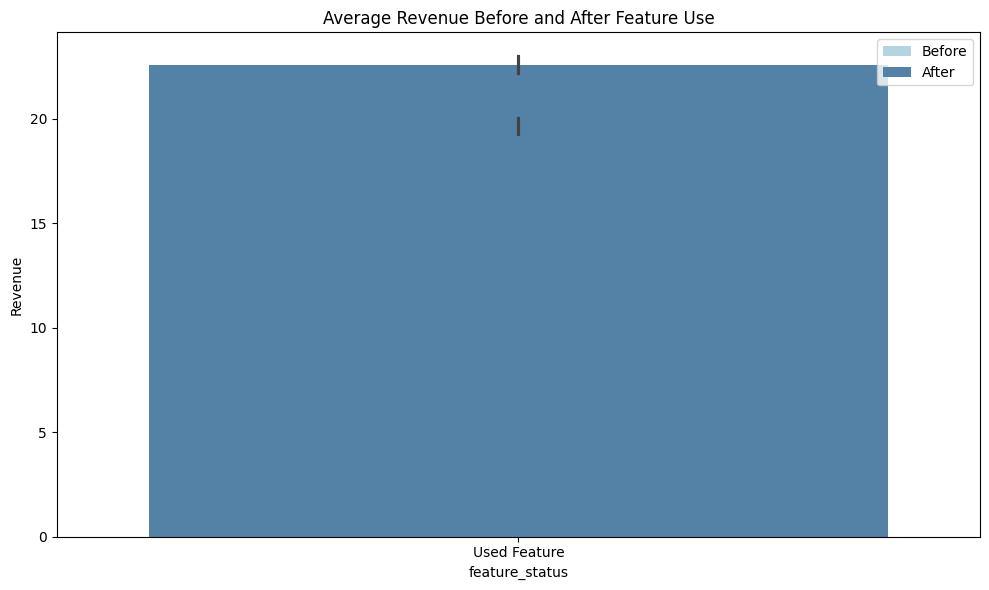

In [8]:
# Convert boolean to readable label
df['feature_status'] = df['used_feature'].map({True: 'Used Feature', False: 'Did Not Use Feature'})

# Bar plot for revenue comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='feature_status', y='revenue_before', color='lightblue', label='Before')
sns.barplot(data=df, x='feature_status', y='revenue_after', color='steelblue', label='After')
plt.title("Average Revenue Before and After Feature Use")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Export data with insights if needed
df.to_csv("final_dataset_with_insights.csv", index=False)


In [11]:
print(df["used_feature"].value_counts(dropna=False))
print(df["revenue_after"].isnull().sum())


used_feature
True    10000
Name: count, dtype: int64
0


In [12]:
# Drop rows with missing revenue values
df_clean = df.dropna(subset=["revenue_after"])

# Separate the groups
used = df_clean[df_clean["used_feature"] == True]["revenue_after"]
not_used = df_clean[df_clean["used_feature"] == False]["revenue_after"]

print("Used Feature samples:", used.shape[0])
print("Did Not Use samples:", not_used.shape[0])


Used Feature samples: 10000
Did Not Use samples: 0


In [13]:
import pandas as pd
from scipy.stats import ttest_rel

# Load your final data
df = pd.read_csv("final_users_with_used_feature.csv")

# Drop any rows with missing revenue
df_clean = df.dropna(subset=["revenue_before", "revenue_after"])

# Paired t-test
t_stat, p_val = ttest_rel(df_clean["revenue_before"], df_clean["revenue_after"])

print(f"📊 T-statistic: {t_stat:.4f}")
print(f"📉 P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Revenue increased significantly after using the feature.")
else:
    print("❌ No significant revenue increase detected after feature usage.")


📊 T-statistic: -42.1535
📉 P-value: 0.0000
✅ Revenue increased significantly after using the feature.
